# Very Abnormal Chess Analysis - COGS118A Project

![picture](https://lh3.googleusercontent.com/lNbxqVFv5U5zL-9qyy9L9wqlhLMVVWQ1UzMSA6UYKIqBkhMbfsOhbhH1p095H6VfZtE=s180)




# Names
- Aryaman "The Audacity" Sinha
- Bridget "Self-proclaimed Wordle Champion" Egan
- John "Ya Like Jazz?" Pyjar
- Alex "Apache Server" Tyler


# Abstract

Using a dataset of thousands of chess games, with data including opening move, length of book-approved opening sequence, elo rating of both players, game outcome, and time of the game, we predict the number of turns in a game of chess. Primarily, we will conduct the relevant data wrangling, build a model that will use the previously stated factors to predict game turns using a linear regression model, and then perform some tweaking of the model to improve its outcome. We will be enlisting a number of linear regression algorithms to search for the best method of prediction, including Random Forest regression, Stochastic Gradient Descent regression, Gradient Boosting regression, Bayesian Ridge regression, among many others. In doing this, we plan to supplement the extensive research on game outcome prediction - however, this would serve the purposes of time planning in a tournament or livestream environment, rather than the purpose of education.

# Background

Chess has debatably been the single most popular test subject for the fields of machine learning and artificial intelligence. The game famously put AI on the map with IBM's "Deep Blue" program that managed to best the world champion Garry Kasparov in 1997. And as ML techniques have become more sophisticated and chess has gotten digitized, ML engineers of course keep returning to chess to create more algorithms for the game.

Lichess is one of the most popular online chess websites and our dataset is from games played on it. The most common metric used in chess to rate players is the ELO rating which is based on a relative scale
<a name="elo"></a>[<sup>[1]</sup>](#cite_note-1). Lichess uses a slightly modified version of the official FIDE ELO system wherein the median rating is 1500 so any new account starts off at that rating<a name="elo2"></a>[<sup>[2]</sup>](#cite_note-2). 
An opening in a chess game is defined as the phase where the initial moves are made. Usually the position on the board after the first 2-4 moves has been studied extensively and is considered theory. Each such opening has a name which is one of the features of the dataset. The data also features the number of turns the opening lasted. Exactly defining where the opening phase ends is a matter of subjectivity but the way the dataset quantifies this is by considering the first "out of theory" or "non-book" move as the end of the opening. 
Modern chess is almost always played with time constraints. A 10+3 time constraint implies that each player gets 10 minutes to make all their moves and at the end of each turn they get an additional 3 seconds. Running out of time is one of 4 ways to end a chess game along with Resignation(which is where the losing player forfeits the game), Checkmate(duh), and a Draw.

Most of the prior AI work in the chess field is targetted towards building better engines that can find the best move in a position and also quantifiably analyzing the position on the board<a name="3"></a>[<sup>[3]</sup>](#cite_note-3). There are some prediction models for the outcome of a game<a name="4"></a>[<sup>[4]</sup>](#cite_note-4)  but not much well-documented research into the number of turns a game lasts.

# Data

The dataset that we plan on using can be obtained [here](https://www.kaggle.com/datasets/datasnaek/chess). This Chess dataset features over 20,000 different chess games collected from the website [lichess.org](https://lichess.org/). There are a total of 16 different variables in the dataset, with most being relevant to understanding a game of chess and its outcome. Each observation in the dataset is a single game of chess, containing the outcome along with important information such as what type of opening was performed, the length of the match, and the number of turns just to name a few. As of right now, we do not envision any special handling or cleaning that will be needed for the dataset. This is obviously subject to change once we start working with the set, but for right now we are planning on doing standard cleaning (such as dropping non-significant columns).

# Proposed Solution and Evaluation Metrics

**Proposed Solution**

Given the continuous nature of the predicted value, our project will be focusing on different variants of regression. We are going to vectorize the opening data by one-hot encoding the strings of the 30 most common openings. Using those, and the numerical data of the other features, we will perform regression on the data after we have one hot encoded the openings. There doesn't appear to be a "standard" model we can directly reference our model with - many have tackled predicting the outcomes of chess games or what the most optimal moves are for given situations, but the inputs and outputs of our prediction goal are unique to this project.

**Evaluation Metrics**

Given the way we are setting up the data to be learned from (splitting a random portion to be assigned to training and test data), we are going to be evaluating the data on how well it does compared to the test data. Since we are focusing our models on regression, our evaluation metric will be Mean Squarred Error (MSE).

#Results

In [ ]:
# Import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis & Cleaning

In [ ]:
all_games = pd.read_csv('https://github.com/COGS118A/Group002-Sp22/raw/main/games.csv')

In [ ]:
all_games.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [ ]:
all_games.columns, all_games.shape

(Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
        'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
        'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
       dtype='object'), (20058, 16))

In [ ]:
all_games['turns'].max(), all_games['turns'].min(), all_games['turns'].mean()

(349, 1, 60.46599860404826)

In [ ]:
#begin data cleaning, get rid of unnecessary columns
games = all_games.drop(['created_at',	'last_move_at',	'opening_name', 'white_id', 'black_id', 'moves'], axis=1)
games['rating_difference'] = games['white_rating'] - games['black_rating']
games.head()

,id,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_eco,opening_ply,rating_difference
0,TZJHLljE,False,13,outoftime,white,15+2,1500,1191,D10,5,309
1,l1NXvwaE,True,16,resign,black,5+10,1322,1261,B00,4,61
2,mIICvQHh,True,61,mate,white,5+10,1496,1500,C20,3,-4
3,kWKvrqYL,True,61,mate,white,20+0,1439,1454,D02,3,-15
4,9tXo1AUZ,True,95,mate,white,30+3,1523,1469,C41,5,54


In [ ]:
games['increment_code'].value_counts()

10+0     7721
15+0     1311
15+15     850
5+5       738
5+8       697
         ... 
14+9        1
0+20        1
0+40        1
13+20       1
14+15       1
Name: increment_code, Length: 400, dtype: int64

The increment code describes the type of game being played. For example, a 10+5 game gives 10 minutes for each player, and each move they take gives them 5 seconds back. Some of these are custom games, so we are going to remove the ones with less than 50 occurances, so we don't need to do 400 one-hots. 

In [ ]:
v = games.increment_code.value_counts()
games = games[games.increment_code.isin(v.index[v.gt(20)])]
games['increment_code'].value_counts()

10+0     7721
15+0     1311
15+15     850
5+5       738
5+8       697
         ... 
16+0       22
6+6        22
20+30      21
10+30      21
13+0       21
Name: increment_code, Length: 82, dtype: int64

In [ ]:
games

,id,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_eco,opening_ply,rating_difference
0,TZJHLljE,False,13,outoftime,white,15+2,1500,1191,D10,5,309
1,l1NXvwaE,True,16,resign,black,5+10,1322,1261,B00,4,61
2,mIICvQHh,True,61,mate,white,5+10,1496,1500,C20,3,-4
3,kWKvrqYL,True,61,mate,white,20+0,1439,1454,D02,3,-15
5,MsoDV9wj,False,5,draw,draw,10+0,1250,1002,B27,4,248
...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,24,resign,white,10+10,1691,1220,A80,2,471
20054,WSJDhbPl,True,82,mate,black,10+0,1233,1196,A41,2,37
20055,yrAas0Kj,True,35,mate,white,10+0,1219,1286,D00,3,-67
20056,b0v4tRyF,True,109,resign,white,10+0,1360,1227,B07,4,133


Also the amount of openings is a lot, and some are very rare, so we will do the same thing we did with the increment codes. By making the occurance threshold 10, we half the amount of ecos to look at. 

In [ ]:
games['opening_eco'].value_counts()

A00    899
C00    790
D00    684
B01    668
C41    630
      ... 
A67      1
D95      1
A99      1
D22      1
D19      1
Name: opening_eco, Length: 361, dtype: int64

In [ ]:
v = games.opening_eco.value_counts()
games = games[games.opening_eco.isin(v.index[v.gt(5)])]

In [ ]:
games['opening_eco'].value_counts()

A00    899
C00    790
D00    684
B01    668
C41    630
      ... 
E34      6
D41      6
C72      6
B93      6
C06      6
Name: opening_eco, Length: 224, dtype: int64

Now we will bianrize the rated column. 

In [ ]:
games['rated'] = games['rated'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
games

,id,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_eco,opening_ply,rating_difference
0,TZJHLljE,0,13,outoftime,white,15+2,1500,1191,D10,5,309
1,l1NXvwaE,1,16,resign,black,5+10,1322,1261,B00,4,61
2,mIICvQHh,1,61,mate,white,5+10,1496,1500,C20,3,-4
3,kWKvrqYL,1,61,mate,white,20+0,1439,1454,D02,3,-15
5,MsoDV9wj,0,5,draw,draw,10+0,1250,1002,B27,4,248
...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,1,24,resign,white,10+10,1691,1220,A80,2,471
20054,WSJDhbPl,1,82,mate,black,10+0,1233,1196,A41,2,37
20055,yrAas0Kj,1,35,mate,white,10+0,1219,1286,D00,3,-67
20056,b0v4tRyF,1,109,resign,white,10+0,1360,1227,B07,4,133


Before we get started with one hot encoding our data, let's take a look at a correlation matrix of the games dataset. This will allow us to see if there's any strongly correlated variables in our dataset before we one hot encode.

In [ ]:
games.corr()

,rated,turns,white_rating,black_rating,opening_ply,rating_difference
rated,1.000000,0.087859,0.010519,0.038552,0.004216,-0.032924
turns,0.087859,1.000000,0.131953,0.161340,0.047490,-0.035129
white_rating,0.010519,0.131953,1.000000,0.634758,0.245077,0.423175
black_rating,0.038552,0.161340,0.634758,1.000000,0.228403,-0.431499
opening_ply,0.004216,0.047490,0.245077,0.228403,1.000000,0.018303
rating_difference,-0.032924,-0.035129,0.423175,-0.431499,0.018303,1.000000


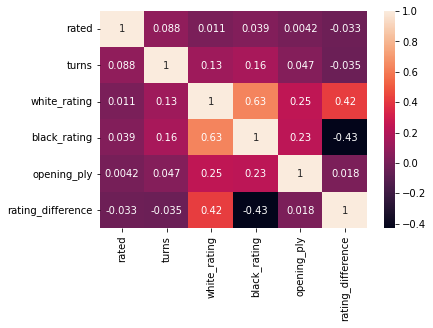

In [ ]:
sns.heatmap(games.corr(), annot=True)
plt.show()

There doesn't seem to be too much high correlation present besides white and black rating although these two in should be correlated since the matching making system would most likely match players of similar ranking to prevent newer players getting badly beaten by more expiercened players.



Now, let's get to one-hot encoding our dataset. We will encode the victory status, winner, increment code, and the opening eco, which represents the regulated code for what opening was played. 

In [ ]:
len(games['victory_status'].value_counts()), len(games['winner'].value_counts()), len(games['increment_code'].value_counts()), len(games['opening_eco'].value_counts())

(4, 3, 82, 224)

In [ ]:
games_pre_one_hot = games

But it seems like there are a lot of openings. 

In [ ]:
from sklearn.preprocessing import OneHotEncoder

vict_dummies = pd.get_dummies(games.victory_status)
winn_dummies = pd.get_dummies(games.winner)
incr_dummies = pd.get_dummies(games.increment_code)
open_dummies = pd.get_dummies(games.opening_eco)
games = pd.concat([games, vict_dummies], axis=1)
games = pd.concat([games, winn_dummies], axis=1)
games = pd.concat([games, incr_dummies], axis=1)
games = pd.concat([games, open_dummies], axis=1)

games

,id,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_eco,opening_ply,...,E34,E60,E61,E70,E76,E77,E80,E81,E90,E91
0,TZJHLljE,0,13,outoftime,white,15+2,1500,1191,D10,5,...,0,0,0,0,0,0,0,0,0,0
1,l1NXvwaE,1,16,resign,black,5+10,1322,1261,B00,4,...,0,0,0,0,0,0,0,0,0,0
2,mIICvQHh,1,61,mate,white,5+10,1496,1500,C20,3,...,0,0,0,0,0,0,0,0,0,0
3,kWKvrqYL,1,61,mate,white,20+0,1439,1454,D02,3,...,0,0,0,0,0,0,0,0,0,0
5,MsoDV9wj,0,5,draw,draw,10+0,1250,1002,B27,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,1,24,resign,white,10+10,1691,1220,A80,2,...,0,0,0,0,0,0,0,0,0,0
20054,WSJDhbPl,1,82,mate,black,10+0,1233,1196,A41,2,...,0,0,0,0,0,0,0,0,0,0
20055,yrAas0Kj,1,35,mate,white,10+0,1219,1286,D00,3,...,0,0,0,0,0,0,0,0,0,0
20056,b0v4tRyF,1,109,resign,white,10+0,1360,1227,B07,4,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
games['white_rating'].value_counts()

1500    710
1480     49
1400     45
1708     45
1536     45
       ... 
2298      1
2248      1
2430      1
974       1
880       1
Name: white_rating, Length: 1481, dtype: int64

Now we can visualize the data to see what features have correlation. Firsly, the white and black ratings should be 

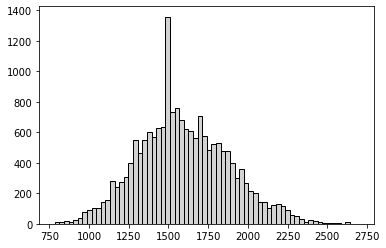

In [ ]:
plt.hist(games['white_rating'], edgecolor='black', bins = 66, color = 'lightgrey');

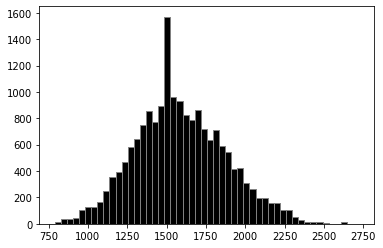

In [ ]:
plt.hist(games['black_rating'], edgecolor='grey', bins = 50, color = 'black');

The large bump at 1500 represents the default score of a chess.com player. When a person makes an account, their elo is set to 1500. Their elo stays at 1500 into the player has played 10 games, so any player at 1500 is not a good representat 0f their elo. 

it seems like the 1500 ratings are skewing the data. 

In [ ]:
games = games[games.black_rating != 1500]
games = games[games.white_rating != 1500]
games

,id,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_eco,opening_ply,...,E34,E60,E61,E70,E76,E77,E80,E81,E90,E91
1,l1NXvwaE,1,16,resign,black,5+10,1322,1261,B00,4,...,0,0,0,0,0,0,0,0,0,0
3,kWKvrqYL,1,61,mate,white,20+0,1439,1454,D02,3,...,0,0,0,0,0,0,0,0,0,0
5,MsoDV9wj,0,5,draw,draw,10+0,1250,1002,B27,4,...,0,0,0,0,0,0,0,0,0,0
6,qwU9rasv,1,33,resign,white,10+0,1520,1423,D00,10,...,0,0,0,0,0,0,0,0,0,0
8,dwF3DJHO,1,66,resign,black,15+0,1439,1392,C50,6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,1,24,resign,white,10+10,1691,1220,A80,2,...,0,0,0,0,0,0,0,0,0,0
20054,WSJDhbPl,1,82,mate,black,10+0,1233,1196,A41,2,...,0,0,0,0,0,0,0,0,0,0
20055,yrAas0Kj,1,35,mate,white,10+0,1219,1286,D00,3,...,0,0,0,0,0,0,0,0,0,0
20056,b0v4tRyF,1,109,resign,white,10+0,1360,1227,B07,4,...,0,0,0,0,0,0,0,0,0,0


## Regression with Pipelines
Now that we have done some EDA on our dataset, let's get to working with some models. For simplicty, we are going to implement a pipeline to help speed with setup for the regression. With the vast amount regression models in Sklearn, let's audition a large group before we move to a grid search with the top performers.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV

In [ ]:
# Set up the one hot encoding into a new data frame for regression
games_pre_one_hot['opening_eco'] = games_pre_one_hot['opening_eco'].str[0]
games_pre_one_hot['time_control'] = games_pre_one_hot['increment_code'].str.split('+').str[0].astype('int64')
games_pre_one_hot['increment'] = games_pre_one_hot['increment_code'].str.split('+').str[-1].astype('int64')
games_pre_one_hot = games_pre_one_hot.drop('increment_code', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(games_pre_one_hot.drop(columns = ['turns', 'id']), games_pre_one_hot['turns'], test_size=0.3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
# One hot Encoding categorical columns, standardizing white and black rating and rating_diff

categorical_cols = ['victory_status', 'rated', 'victory_status', 'winner', 'opening_eco']
num_cols = ['white_rating', 'black_rating', 'rating_difference']
cat_trans = Pipeline(steps = [('oh', OneHotEncoder())])
num_trans = Pipeline(steps = [('scaler', StandardScaler())])
preproc = ColumnTransformer([('categ', cat_trans, categorical_cols), 
                             ('num', num_trans, num_cols)])

In [ ]:
# Vanilla Linear Regression

pl = Pipeline(steps = [('prep', preproc), ('regress', LinearRegression())])
pl.fit(X_train, y_train)
mean_squared_error(pl.predict(X_test), y_test)

979.6320443469647

In [ ]:
# K-Nearest Neighbors Regression

pl = Pipeline(steps = [('prep', preproc), ('regress', KNeighborsRegressor())])
pl.fit(X_train, y_train)
mean_squared_error(pl.predict(X_test), y_test)

1107.7287995614838

In [ ]:
# Decision Tree Regression

pl = Pipeline(steps = [('prep', preproc), ('regress', DecisionTreeRegressor())])
pl.fit(X_train, y_train)
mean_squared_error(pl.predict(X_test), y_test)

1818.3858998027008

In [ ]:
# Multi-Layer Percptron Regression
# Takes time to run

pl = Pipeline(steps = [('prep', preproc), ('regress', MLPRegressor())])
pl.fit(X_train, y_train)
mean_squared_error(pl.predict(X_test), y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


963.5950396639583

In [ ]:
# Random Forest Regression

pl = Pipeline(steps = [('prep', preproc), ('regress', RandomForestRegressor())])
pl.fit(X_train, y_train)
mean_squared_error(pl.predict(X_test), y_test)

990.4621691472963

In [ ]:
# Gradient Boosting Regression

pl = Pipeline(steps = [('prep', preproc), ('regress', GradientBoostingRegressor())])
pl.fit(X_train, y_train)
mean_squared_error(pl.predict(X_test), y_test)

958.666359990082

In [ ]:
# Stochastic Gradient Descent Regression

pl = Pipeline(steps = [('prep', preproc), ('regress', SGDRegressor())])
pl.fit(X_train, y_train)
mean_squared_error(pl.predict(X_test), y_test)

980.6958887970867

In [ ]:
# Bayesian Ridge Regression

pl = Pipeline(steps = [('prep', preproc), ('regress', BayesianRidge())])
pl.fit(X_train, y_train)
mean_squared_error(pl.predict(X_test), y_test)

979.768375226962

In [ ]:
# Kernel Ridge Regression

pl = Pipeline(steps = [('prep', preproc), ('regress', KernelRidge())])
pl.fit(X_train, y_train)
mean_squared_error(pl.predict(X_test), y_test)

979.5412170183897

## Grid Search

Out of all our different methods used above, the two best performing were the Multi-layer Perceptron and Gradient Boosting. Let's run a grid search on these two and see how much better of a result we can get.

In [ ]:
# MLP Grid Search
param_list = {
  'regress__hidden_layer_sizes' : [(50,), (100,), (150,), (200,)]
}

pl = Pipeline(steps = [('prep', preproc), ('regress', MLPRegressor())])
grids = GridSearchCV(pl, param_grid = param_list, cv = 3, return_train_score = True, scoring = 'neg_mean_absolute_error', n_jobs = -1)
grids.fit(X_train, y_train)
grids.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


{'regress__hidden_layer_sizes': (100,)}

In [ ]:
# Refit with the best parameter combo returned from grid search
pl = Pipeline(steps = [('prep', preproc), ('regress', MLPRegressor(hidden_layer_sizes = (100,)))])
pl.fit(X_train, y_train)
mean_squared_error(pl.predict(X_test), y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


965.9618859514036

In [ ]:
# Gradient Boosting Grid Search
param_list = {
  'regress__max_depth' : [3, 4, 5],
  'regress__min_samples_split' : [2, 3, 4]
}

pl = Pipeline(steps = [('prep', preproc), ('regress', GradientBoostingRegressor())])
grids = GridSearchCV(pl, param_grid = param_list, cv = 3, return_train_score = True, scoring = 'neg_mean_absolute_error', n_jobs = -1)
grids.fit(X_train, y_train)
grids.best_params_

{'regress__max_depth': 3, 'regress__min_samples_split': 4}

In [ ]:
# Refit with the best parameter combo returned from grid search
pl = Pipeline(steps = [('prep', preproc), ('regress', GradientBoostingRegressor(max_depth = 3, min_samples_split = 4))])
pl.fit(X_train, y_train)
mean_squared_error(pl.predict(X_test), y_test)

958.4328315860093

From the grid searching performed, we can see a slight improvement in MSE of Gradient Boosting. This further soldifies Gradient Boosting as the best model of the bunch.




# Discussion


## Interpreting the result
Our results are inconclusive at best. While our testing has proved that predicting game length from categorical factors like rating and opening is indeed a regressable relationship, even our most accurate method using Gradient Boosting leaves something to be desired with a MSE of 958.43. That being said, determining a single best algorithm for the task is a huge step in the right direction.

Of course, chess is a game where people have to make constant choices, going well beyond which opening they use. For that reason, a high error for predicting the length of a game is expected, except for maybe the highest level of play where players more frequently make moves proven to be optimal given the situation their respective openings have led them to. With that in mind, an MSE of 958, predicting across all ratings and therefore skill levels, is better than anticipated - additional testing is definitely in order here.

In subsequent studies we would hopefully have the computational power to search through even more Gradient Boosting hyperparameters, for starters. Additionally, some of the predicting variables may not have been as arbitrary as we'd initially thought, so gradual reinclusion may or may not help in minimizing prediction error. In its current state, our algorithm cannot assist in the problem of tournament schedule or livestream planning as we'd set out to do.

## Limitations
Once we got to grid searching, we unfournately ran into some limitations with computation power and time. Espcially with Multi-layer Percptrons, there are so many different hyperparamters that are able to be tweaked that we simply lacked the resouces to test them all. Even we tried smaller combinations, Google Colab still timed us for the cell taking too long to run.

## Ethics & Privacy
One potential privacy issue with this project lies in the way the data is collected. This is true for all web-scrape type data, but we essentially use harvested user data, complete with usernames and other user information, from which the users have not explicitly agreed to our (or any other programmer's) direct usage of, apart from the general agreements of Lichess's Terms of Service. These data entries include a data and time for each and every game played, so it is a little troubling that we have (reductively) a record of what these players were doing at a given time on a given day.
  
  It should also be noted that the majority of new-age chess players learn by playing different AI chess "bots". The implication of this is that whatever outcomes these programs find preferable directly influence what the most common options will be for real human chess players. Whether this fact is unethical in itself is up for debate, but it's undeniable that AI programs have computationalized and flow-charted the game of chess pretty irreversibly.

## Conclusion
With so much computational work already done on predicting the outcome of a chess game, we found it high time for research dedicated to predicting game length itself. Time is money, after all, and being able to predict how much time would be spent on a game of chess after the opening moves would certainly prove to be valuable.

While we weren't able to predict with anything close to pinpoint accuracy, as expected, we have identified a definitive approach to the question, and would likely be able to improve accuracy with additional computational resources.

All in all, this project alone didn't produce anything conclusive, but rather has left us with crucial information to take going forward - the proper algorithm to employ, as well as new questions about optimal hyperparameters and variables of prediction. This is but a small contribution to the massive, ever-expanding sphere of computationalizing the game of chess.

# Footnotes
<a name="elo"></a>1.[^](#lorenz): ELO Rating Chess. https://www.chess.com/terms/elo-rating-chess<br> 
<a name="elo2"></a>2.[^](#admonish): Lichess rating system. https://lichess.org/page/rating-systems#:~:text=Lichess%20ratings%20start%20at%201500,as%20FIDE%20or%20chess.com.<br>
<a name="research"></a>3.[^](#sota): Chess Research: https://towardsdatascience.com/predicting-professional-players-chess-moves-with-deep-learning-9de6e305109e<br>
<a name="4"></a>4.[^](#sota): Outcome of a game: https://cs229.stanford.edu/proj2013/FanKuangLin-ChessGameResultPredictionSystem.pdf
